In [1]:
### IMPORTS CLASSES
import numpy as np
import math
import os
import matplotlib.pyplot as plt
from pylab import title, show
from scipy.constants import c,e
from laser import laser_profiles as las
from elementary_processes import ionization as ion
from elementary_processes import potential as pot
from particles import particle_data as ptcl
import sys
from sklearn.preprocessing import normalize

### Input parameters 

In [2]:
#----------------
# LASER PARAMETER
#----------------

#Peak a0 of  the laser pulse
a0 = 2.1

#Wavelength of the laser (in microns)
lambda_0 = 800e-3

#Waist of the laser in the focus (in microns)
w0 = 22

#Laser duration (in femtoseconds)
ctau = 10.1

#Laser focus (in microns)
zf = 50

#-------------------
# PARTICLE PARAMETER
#-------------------

#Max gas density (in 1/cm^3)
ne = 1e24

#The used element (use the shortcut)
element = 'N'

#The energy level that should get ionized
ion_level = 6

#Energy of the ionized electrons after ionization (in Joule)
energy = 0*e


#---------------------
# SIMULATION PARAMETER
#---------------------

#Array over the laser pulse
zz = np.linspace(3*ctau,-3*ctau,1e6)



/Users/sebastian/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


---

### Calculations

In [14]:
#------------------------------------
# Calculate the ionization parameters
#------------------------------------

#Ionization energy
U_i = ptcl.get_ion_energy(element,ion_level)

#Ionization probability
prob = ion.ionization_probability(zz,a0,w0,ctau,zf,lambda_0,U_i,energy)

#Ionization degree:
"""
NOTE: This function assumes, that ALL electrons have the same given kinetic energy after 
      ionization! Use the function in the next cell (ionization-energy-distribution) if
      you want to get an energy distribution of the ionized electrons for a given
      ionization level!
"""
degree = ion.ionization_degree(zz,prob)

#Laser field
laser_field = las.gaussian_field(zz, a0,w0,ctau,zf,lambda_0)

#Laser envelope
laser_envelope = las.gaussian_envelope(zz, a0,ctau)

#Wakefield
wake = pot.wakefield(zz,a0,ctau,ne)

#Trapping condition
condition = pot.condition_fullfilled(zz,a0,ctau,lambda_0,ne,return_condition = False)



Calculating the ionization energy distribution: 100.0%


/Users/sebastian/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


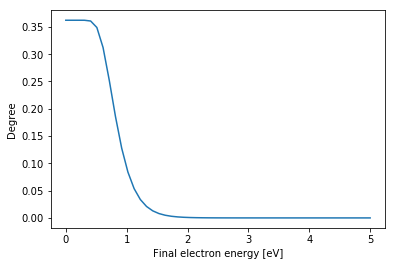

In [4]:
"""
Calculates the energy distribution of the ionized electrons for a given ionization level. Take a look at the
documentation for further information!
"""
energy_distribution = ion.ionization_energy_distribution(zz,a0,w0,ctau,zf,lambda_0,U_i,energy_range=(0,5,0.1))

### Results

In [5]:
#-------------------
# Prints the results
#-------------------

print("----------------------------------------------------------")
print("Results of the LPA-Tools ionization calculation script:")
print("")
print("The "+str(ion_level)+". niveau of the element '"+str(element)+"' has an ionization energy of "+str(U_i)+" eV.")
print("")
print("With a peak a0 of "+str(a0)+", the max. ionization probability is "+str(100*prob.max())+" %.")
print("")
print("The final degree of ionization behind the laser pulse is "+str(100*degree[len(degree)-1])+" % assuming")
print("that ALL electrons have the final kinetic energy of "+str(energy/e)+"eV")
print("----------------------------------------------------------")

----------------------------------------------------------
Results of the LPA-Tools ionization calculation script:

The 6. niveau of the element 'N' has an ionization energy of 552.07 eV.

With a peak a0 of 2.1, the max. ionization probability is 0.156216289073 %.

The final degree of ionization behind the laser pulse is 100.0 % assuming
that ALL electrons have the final kinetic energy of 0.0eV
----------------------------------------------------------


### Plots

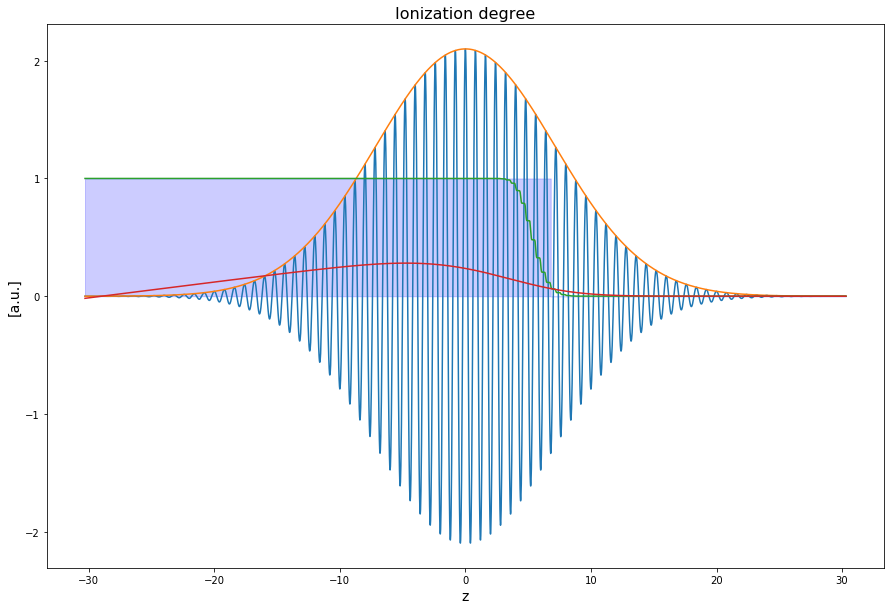

In [24]:
plt.figure(figsize=(15,10))

plt.plot(zz,laser_field)
plt.plot(zz,laser_envelope)
plt.plot(zz,degree)
plt.plot(zz,wake)
plt.fill_between(zz,0,condition,alpha=.2,color='blue')

plt.xlabel("z",fontdict={'size':14})
plt.ylabel("[a.u.]",fontdict={'size':14})
title("Ionization degree",fontdict={'size':16})
plt.show()

---